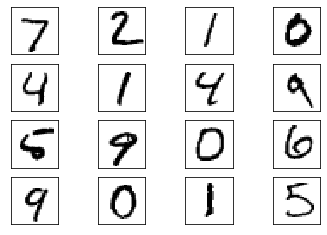

(60000, 28, 28)


In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## Show some images
def show_images(images, rows, cols):
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray_r)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    
def vectorize(_image):
    return np.reshape(_image, (-1,1))

def matrixize(_vec):
    return np.reshape(_vec, (28,28))

show_images(x_test, 4, 4)
print(np.shape(x_train))

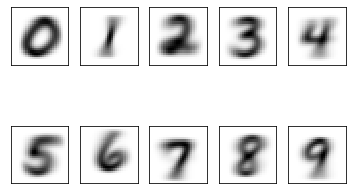

In [2]:
# compute mean of images 
#pixel_sums = np.zeros((10,d,d))  # use np.ones instead of zeros to avoid divide by zero, called Laplace smoothing
#total_count = np.zeros((10))  #generate a list for counts of occurances

mu = []
for i in range(10):
    mu.append(np.mean(x_train[y_train==i,:], axis=0))
  
show_images(mu,2,5)
vec_mu = np.array([vectorize(m) for m in mu])

#compute covariance
cov = []
for i in range(10):
    cov.append(np.cov(np.array([np.reshape(x,(-1)) for x in x_train[y_train==i,:]]).T))

#plt.imshow(sigma[1])
#plt.show()

In [3]:
def log_likelihood(_x, _mu, _inv_cov):
    ## _x and _mu should be column vectors, and _cov should be an n \times n matrix

    assert np.shape(_x) == np.shape(_mu)
    ### note the first term is positive since we are working with inverse determinant
    
    _log_likelihood = np.linalg.slogdet(_inv_cov)[1] - (_x-_mu).T@_inv_cov@(_x-_mu)
    return _log_likelihood[0,0]


In [10]:
## Classify test images

# Note, testing all images takes some time, try with test_size = 100 first
test_size = 10000

lamb_vals = [10**i for i in range(-1,6)]
errors = [0]*len(lamb_vals)

for jj, lamb in enumerate(lamb_vals):
    inv_cov = []
    ### pre-compute the inverse covariance matrices for speedup
    for y in range(10):
        inv_cov.append(np.linalg.inv(cov[y] + lamb*np.eye(784)))

    for j, x in enumerate(x_test[:test_size]):
        log_lr = []
        for y in range(10):       
            log_lr.append(log_likelihood(vectorize(x), vectorize(mu[y]), inv_cov[y]))

        prediction = np.argmax(log_lr)
        #print(log_lr)
        if prediction != y_test[j]:
            errors[jj] = errors[jj]+1

    print([e/test_size for e in errors])

[0.1892, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1892, 0.1588, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.1892, 0.1588, 0.1226, 0.0, 0.0, 0.0, 0.0]
[0.1892, 0.1588, 0.1226, 0.0806, 0.0, 0.0, 0.0]
[0.1892, 0.1588, 0.1226, 0.0806, 0.0489, 0.0, 0.0]
[0.1892, 0.1588, 0.1226, 0.0806, 0.0489, 0.0507, 0.0]
[0.1892, 0.1588, 0.1226, 0.0806, 0.0489, 0.0507, 0.1401]


In [11]:
## plot of 

print(lamb_vals)

[0.1, 1, 10, 100, 1000, 10000, 100000]


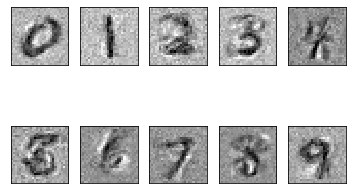

In [23]:
## plot a few examples
sample_images = []
for y in range(10):
    A = np.linalg.cholesky(cov[y]+1000*np.eye(784))
    x = vec_mu[y] + A@np.random.randn(28*28,1)
    sample_images.append(matrixize(x))

show_images(sample_images,2,5)    

In [ ]:
print(np.shape(x_train))
np.shape(x_train[y_train==0])